* comp benchmarking between a startup and a mid/large company. 
* Base salary and bonus are one aspect, but then also realizing compensation has so many more dimensions that aren’t reflected.
* trying to figure out how far was appropriate to negotiate on my offers!

In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator
import matplotlib.ticker as ticker
import stylize_mpl as sm
import helper as helper
from matplotlib.lines import Line2D
import re
sns.set_theme()

In [226]:
datasource_label = 'r/biotech salary survey, 2024'
df = pd.read_csv('r_biotech salary and company survey - 2024.csv')

In [227]:
df['Compensation - Annual Base Salary/Pay'] = df['Compensation - Annual Base Salary/Pay'].apply(lambda x: x * 1000 if x < 1000 else x)

In [228]:
# drop the first row "test"
if 'test' in df.iloc[0]:
    df = df.drop([0]) 
    df

In [229]:
df.columns

Index(['Timestamp', 'What country do you work in?',
       'Where is the closest major city or hub?', 'Where are you located?',
       'Biotech sub industry?', 'Company or Institution Name',
       'Company Details - public/private/start-up/ subsidiary of ',
       'Company Detail - Approximate Company Size',
       'Role / Title of current position', 'What degrees do you have? ',
       'List other relevant and recognized certifications',
       '[Optional] Briefly describe your position', 'Years of Experience',
       'Compensation - Annual Base Salary/Pay', 'Compensation - Overtime Pay',
       'Compensation - Annual Target Bonus ($)',
       'Compensation - Annual Equity/Stock Option',
       'Compensation - Most recent annual yearly raise (%)',
       'Compensation - Sign on Bonus Value',
       'Compensation - Sign on Stock/Equity Options',
       'Compensation - Retirement Benefits (free text)',
       'Compensation - Retirement Percent Match (free text)',
       'Compensation -

# Clean Location column

In [230]:
list(df['Where is the closest major city or hub?'].sort_values().str.lower().str.strip().unique())

['nyc',
 'atlanta',
 'boston',
 'basel',
 'bay area',
 'boulder',
 'cambridge',
 'chicago',
 'dc area/i-270',
 'denver',
 'detroit',
 'frankfurt am main',
 'georgia',
 'houston',
 'i-270 corridor',
 'indianapolis',
 'kansas city',
 'la',
 'london',
 'los angeles',
 'manchester',
 'midwest',
 'milwaukee',
 'minneapolis',
 'new jersey',
 'new york',
 'new york city',
 'pacific nw',
 'philadelphia',
 'portland',
 'research triangle',
 'salt lake city',
 'san diego',
 'san francisco',
 'seattle',
 'st louis',
 'stockholm',
 'tampa',
 'vancouver',
 'washington dc',
 'philly',
 nan]

In [231]:
# part of the 2024 survey asked for the closest major city or hub, not the location, and is no longer free text
df['Where are you located?'].unique()

array([nan, 'Canada', 'West Coast (California & Pacific Northwest)',
       'France', 'Pharma Central (NY, NJ, PA)',
       'United Kingdom and Ireland', 'denmark', 'Germany',
       'Carolinas & Southeast (From NC to AR, South FL and LA)',
       'New England (MA, CT, RI, NH, VT, ME)',
       'DC Metro Area (DC, VA, MD, DE)', 'Spain',
       'Midwest (From OH to KS, North to ND)', 'Belgium', 'EU',
       'South & Mountain West (TX to AZ, North to MT)', 'india',
       'Other US Location (HI, AK, PR, etc.)', 'CO', 'Sweden',
       'Singapore', 'San Diego, CA', 'Australia', 'Switzerland',
       'Benelux', 'Denmark', 'Netherlands', 'Switzerland ', 'Remote - US',
       'Research Triangle Park, NC', 'spain', 'Poland', 'Argentine',
       'Australia ', 'Austria', 'australia', 'Boston', 'Kenya',
       'Tennessee ', 'NL', 'India', 'FRANCE', 'France ', 'Chile ',
       'russia', 'Central VA', 'San Diego', 'Netherlands ', 'Belgium ',
       'Spain (Barcelona)', 'Finland', 'Elkton, Virginia',

In [232]:

geographical_mapping = {
    # Within USA
    'San Francisco Bay Area': ['bay area', 'berkeley', 'san francisco', 'oakland', 'palo alto', 'newark, ca', 'south san francisco', 'sacramento','hayward, ca'],
    'Los Angeles Metro': ['los angeles', 'thousand oaks', 'irvine', 'la', 'los ángeles', 'thousand oaks \(los angeles\)','santa barbara', 'irvine', 'socal','orange county','irvine, ca'],
    'San Diego Metro': ['san diego', 'carlsbad', 'san diego, ca'],
    'Boston Metro': ['boston', 'cambridge,? ma', 'worcester ma', 'waltham', 'devens', 'greater boston', 'near boston','boston/cambridge'],
    'New York Metro': ['nyc', 'new york', 'ny,? ny', 'nyc metro', 'new york metro', 'new york city', 'central/north jersey', 'new jersey, usa'],
    'Chicago Metro': ['chicago', 'chicagoland', 'illinois'],
    'Baltimore/Washington DC Metro': ['washington dc', 'dc area', 'gaithersburg, maryland', 'baltimore', 'rockville, md', 'dc','baltimore', 'baltimore, md', 'baltimore/washington dc','I-270 corridor',],
    'Texas': ['college station tx','houston', 'waco', 'houston, tx', 'houston,tx', 'waco, tx','dallas', 'fort worth', 'remote, tx, us','austin, tx'],
    'Seattle Metro': ['seattle', 'seattle area', 'seattle wa', 'seattle, wa', 'seattle but i work remotely from fl'],
    'Raleigh-Durham Metro': ['raleigh', 'durham, nc', 'rtp', 'research triangle','rtp nc', 'rtp north carolina', 'rtp, nc', 'rtp, north carolina','raleigh-durham','North Carolina'],
    'New Jersy-Philadelphia Metro': ['philly','philadelphia', 'philadelphia metro', 'philadelphia, pa','new jersey','nj-philadelphia', 'nj-philly-de','nj'],
    'Great Lakes': ['usa, albany','Detroit'],
    'Phoenix Metro': ['phoenix'],
    'Denver Metro': ['denver', 'boulder', 'colorado', 'boulder \(remote, company in bay\)', 'boulder, co'],
    'Pittsburgh Metro': ['pittsburgh'],
    'Portland Metro': ['portland, or'],
    'Salt Lake City Metro': ['salt lake city', 'salt lake city, ut'],
    'Kansas City Metro': ['kansas city', 'kansas city, mo','kansas city, missouri, united states'],
    'Indianapolis Metro': ['indianapolis', 'indianapolis, in'],
    'St. Louis Metro': ['saint louis', 'st\. louis'],
    'Florida': ['miami','orlando','tampa'],
    'Atlanta Metro': ['atlanta'],
    'Ohio': ['cincinnati, ohio','cleveland'],
    'Madison Metro': ['madison, wisconsin'],
    'Central Maine Metro': ['central maine'],
    'Bloomington Metro': ['bloomington, in, usa'],
    'Tennessee': ['Knoxville, TN'],
    # outside of USA:
    'Canada': ['calgary','montreal','toronto','vancouver, canada','halifax, nova scotia','canada'],
    'United Kingdom': ['brighton, uk', 'cambridge uk', 'cambridge, uk', 'u\.k', 'u\.k\.', 'uk', 'macclesfield, uk','dublin','dundee'],
    'Israel': ['rehovot','israel'],
    'Germany': ['munich','germany'],
    'Netherlands': ['netherlands'],
    'Belgium': ['belgium'],
    'Austria': ['austria'],
    'Switzerland': ['switzerland'],
    'Brazil': ['brazil'],
    'France': ['france'],
}

economic_region_mapping = {
    # USA regions
    'New England': [
        'boston', 'cambridge,? ma', 'worcester ma', 'waltham', 'devens', 'cambridge',
        'greater boston', 'near boston','boston/cambridge', 'central maine', 
        'new england, not boston',r'\bma\b','new haven','ridgefield, ct','Providence',
        'Boston / Remote','Hartford, CT'
    ],
    'U.S. Mideast': [
        r'\bny\b','nyc', 'new york', 'ny,? ny', 'nyc metro', 'new york metro', 
        'new york city', 'philadelphia', 'philadelphia metro', 'philadelphia, pa', 'philadelphia',
        'new jersey','nj-philadelphia', 'nj-philly-de','nj', 'baltimore', 
        'washington dc', 'dc area','Washington D.C. Metro','gaithersburg, maryland', 'baltimore','rockfille', 
        'rockville, md', 'dc','baltimore', 'baltimore, md', 'baltimore/washington dc',
        'newark, de','pa','nj','dc','maryland','triangle','pennsylvania','central/north jersey',
        'syracuse','buffalo','Albany','philly'
    ],
    'U.S. Southeast': [
        'charlotte','raleigh', 'durham, nc', 'rtp', 'research triangle', 'rtp nc', 
        'rtp north carolina', 'rtp, nc', 'rtp, north carolina', 'raleigh-durham', 
        'north carolina', 'florida', 'miami', 'orlando', 'tampa','boca raton', 'atlanta', 
        'georgia', 'nashville', 'knoxville, tn','Southeast'
    ],
    'Great Lakes': [
        'chicago', 'chicagoland', 'chicago, il','illinois', 'madison, wisconsin', 'cincinnati, ohio', 
        'cleveland', 'pittsburgh', 'usa, albany', 'michigan, usa', 'indianapolis', 
        'indianapolis, in', 'saint louis', 'st\. louis', 'St Louis','minnesota','Ohio',
        'bloomington, in, usa','Detroit',
        'minneapolis','minneapolis, mn','Columbus','Columbus, OH','Ann Arbor','madison'
    ],
    'U.S. Plains': [
        'kansas city', 'kansas city, mo', 'kansas city, missouri, united states', 
        'dallas', 'college station tx', 'houston', 'waco', 'houston, tx', 'houston,tx', 
        'waco, tx', 'remote, tx, us', 'austin, tx', 'oklahoma city', 'nebraska', 
        'south dakota','Midwest'
    ],
    'U.S. Rocky Mountains': [
        'denver', 'boulder', 'colorado', 'boulder \(remote, company in bay\)', 
        'boulder, co', 'salt lake city', 'salt lake city, ut', 'idaho', 'montana'
    ],
    'U.S. Southwest': [
        'phoenix', 'las vegas', 'albuquerque', 'tucson, az.', 'new mexico', 
        'san antonio, texas','San Antonio'
    ],
    'U.S. West Coast': [
        'bay area', 'berkeley', 'san francisco', 'oakland', 'palo alto', 'newark, ca', 
        'south san francisco', 'sacramento', 'hayward, ca', 'san diego', 'carlsbad', 
        'san diego, ca', 'los angeles', 'thousand oaks', 'irvine', r'\bla\b', 
        'los ángeles', 'thousand oaks \(los angeles\)', 'santa barbara', 'irvine', 
        'socal', 'orange county', 'irvine, ca', 'seattle', 'seattle area', 
        'seattle wa', 'seattle, wa', 'seattle but i work remotely from fl', 
        'portland, or', 'alaska', 'hawaii',r'\bca\b',r'\bwa\b','california','portland',
        'redwood city'
    ],
    # Outside USA
    'Canada': [
        'calgary', 'montreal', 'toronto', 'vancouver, canada', 'halifax, nova scotia', 
        'canada','vancouver'
    ],
    'United Kingdom': [
        'brighton, uk', 'cambridge uk', 'cambridge, uk', 'u\.k', 'u\.k\.', 'uk', 
        'macclesfield, uk', 'dublin', 'dundee','ireland','Edinburgh'
    ],
    'Israel': ['rehovot', 'israel'],
    'EU':[
        'munich', 'germany','netherlands','belgium','austria','switzerland','france',
        'athens','vienna','london','oxford','amsterdam','Copenhagen','hamburg'
        ],
    'Brazil': ['brazil'],
    'n/a': ['remote'],
}

df['Economic Region'] = df['Where are you located?']

# Apply the rules to create a new column
for metro_area, keywords in economic_region_mapping.items():
    pattern = '|'.join(keywords)
    df.loc[df['Where is the closest major city or hub?'].str.contains(pattern, case=False, na=False, regex=True), 'Economic Region'] = metro_area

# Number of rows witout an economic region
df['Economic Region'].isna().sum()


np.int64(9)

In [233]:
# df.loc[df['Where is the closest major city or hub?'].str.contains('|'.join(economic_region_mapping['U.S. West Coast']), case=False, na=False), 'Where is the closest major city or hub?'].sample(20)

In [234]:
# Print out rows without economic region AND closest major city
df[df['Economic Region'] == 'n/a'][['Where is the closest major city or hub?', 'Economic Region']]

,Where is the closest major city or hub?,Economic Region


# Clean Job Title Column

In [235]:
df['Role / Title of current position'].sort_values().str.lower().str.strip().unique()

array(['manager, regulatory operations',
       'market research project coordinator', 'vp clin ops',
       'validation engineering consultant', '1', 'ad', 'ad associate ii',
       'as2', 'account manager', 'accountant',
       'active ingredient technician', 'advisor (engineering r5)',
       'advisor (scientist 1)', 'advisor - quantitative scientist',
       'analyst', 'analytical chemist', 'analytical scientist',
       'application development scientist', 'application scientist',
       'application specialist', 'artificial intelligence engineer',
       'ass. scientist', 'assc dir of ai', 'asset exec',
       'assistant director', 'assistant professor (non-tt)',
       'assistant scientist', 'assoc dir', 'assoc director publications',
       'assoc. director', 'assoc. engineering specialist', 'associate',
       'associate / consultant',
       'associate biotech production specialist',
       'associate clinical trial scientist',
       'associate decision scientist', 'associat

In [236]:
# import re

# def map_seniority(title):
#     student_intern_titles = ['intern', 'student', 'postdoctoral', 'postdoc','post-doc']
#     scientist_titles = ['scientist','science','biologist','microbiologist']
#     exec_titles = ['vp', 'chief', 'president']
#     lead_titles = ['lead','principal', 'principle','director','dir']
    
#     senior_designations = ['senior','sr','sr.']
#     associate_designations = ['associate','assoc','assoc.']
    
#     if any(word in title for word in student_intern_titles):
#         role_title = 'Intern or student'
#     elif any(word in title for word in exec_titles):
#         role_title = 'VP or higher'
#     elif re.search(r'associate$',title):
#         role_title = 'Associate'
#     elif ('assoc' in title or "associate" in title) and any(word in title for word in lead_titles):
#         role_title = 'Associate Lead/Principal/Director'
#     elif any(word in title for word in lead_titles):
#         role_title = 'Lead/Principal/Staff/Director'
#     elif any(word in title for word in ['staff']):
#         role_title = 'Lead/Principal/Staff/Director'
#     elif re.search(r's(enior|r\.?)\s*\w*\s*engineer', title):
#         # role_title = 'Senior Engineer'
#         role_title = 'Others'
#     elif 'engineer' in title and not re.search(r's(enior|\.?)\s', title):
#         role_title = 'Others'
#         # role_title = 'Engineer'
#     elif 'engineer' in title:
#         role_title = 'Others'
#         # role_title = 'Engineer'
#     elif re.search(r'senior\s+\w*\s*associate', title) or ('sra' in title) or ('sr. ra' in title):
#         role_title = 'Senior Associate'
#     elif re.search(r'senior\s+\w*\s*researcher', title):
#         role_title = 'Senior Associate'
#     elif re.search(r's(enior|r\.?)\s*\w*\s*scientist', title):
#         role_title = 'Sr. Scientist'
#     elif 'senior scientific researcher' in title:
#         role_title = 'Sr. Scientist'
#     elif 'manager' in title:
#         role_title = 'Manager'
#     elif ('associate' in title or 'researcher' in title) and 'senior' not in title:
#         role_title = 'Associate'
#     elif ('assistant' in title or 'researcher' in title) and 'senior' not in title:
#         role_title = 'Associate'
#     elif title in ['ra 1','ra i','ra 2','ra ii','ra 3','ra iii']:
#         role_title = 'Associate'
#     elif any(word in title for word in scientist_titles) and not re.search(r's(enior|r\.?)\s', title):
#         role_title = 'Scientist'
#     elif 'technician' in title or 'tech' in title:
#         role_title = 'Technician'
#     else:
#         role_title = 'Others'
        
#     # if any(word in title for word in associate_designations):
#     #     role_title = 'Associate. ' + role_title
    
#     # if any(word in title for word in senior_designations):
#     #     role_title = 'Sr. ' + role_title
        
#     return role_title

# df['Seniority Level'] = df['Role / Title of current position'].apply(lambda x: map_seniority(str(x).lower()))

# # unmapped:
# df[['Role / Title of current position','Seniority Level']].to_csv('temp.csv',index=False)
# # list(df[df['Seniority Level'] == 'Others']['Role / Title of current position'])

In [243]:
df['Company Detail - Approximate Company Size'].unique()

array(['1-50', '1000-5000', '5000+', '50-200', '200-1000', nan],
      dtype=object)

In [244]:
df.columns

Index(['Timestamp', 'What country do you work in?',
       'Where is the closest major city or hub?', 'Where are you located?',
       'Biotech sub industry?', 'Company or Institution Name',
       'Company Details - public/private/start-up/ subsidiary of ',
       'Company Detail - Approximate Company Size',
       'Role / Title of current position', 'What degrees do you have? ',
       'List other relevant and recognized certifications',
       '[Optional] Briefly describe your position', 'Years of Experience',
       'Compensation - Annual Base Salary/Pay', 'Compensation - Overtime Pay',
       'Compensation - Annual Target Bonus ($)',
       'Compensation - Annual Equity/Stock Option',
       'Compensation - Most recent annual yearly raise (%)',
       'Compensation - Sign on Bonus Value',
       'Compensation - Sign on Stock/Equity Options',
       'Compensation - Retirement Benefits (free text)',
       'Compensation - Retirement Percent Match (free text)',
       'Compensation -

# Total annual compensation

In [ ]:
import numpy as np

from mappings import map_seniority_levels
df = map_seniority_levels(df)

def convert_to_float(value, base_salary_col):
    """
    Test cases:
        - $15k
        - 10% of salary
        - 15.25% usually
        - 17.5
        - 18,750
        - depends, 10-15%
        - 10,000 in RSU
        - Not Applicable/None
    """
    if ',' in value:
        value = value.replace(',','')
    if '$' in value:
        value = value.replace('$','')
    if '-' in value:
        # e.g., '15000-20000'
        value = value.split('-')[-1]
    
    # text could be '12.50%', '20k', 'None/NA', '10'. 
    # In the last case we assume it's a percentage.
    try:
        if 'None' in value or 'Applicable' in value:
            return 0
        elif '%' in value:
            # e.g., '15.50%'
            match = re.search(r"\d{1,2}(\.\d+)?%", value)
            if match:
                percentage = match.group()
            return base_salary_col * (float(percentage.strip('%')) / 100)
        elif 'k' in value:
            # e.g., '15k'
            match = re.search(r"\d{1,2}k", value)
            return float(match.group().replace('k',''))*1000
        elif 'rsu' in value.lower():
            match = re.search(r"\d+",value)
            return float(match.group())
        elif float(value)<50:
            # assume they have written two digits with no percentage sign
            return base_salary_col * (float(value)/100)
        else:
            return float(value)
    except Exception as error:
        # debug error if needed
        # print(error)
        return 0
    
        
temp_anunal_bonus = df.apply(lambda row: convert_to_float(row['Compensation - Annual Target Bonus ($)'], row['Compensation - Annual Base Salary/Pay']), axis=1)
temp_annual_equity = df.apply(lambda row: convert_to_float(row['Compensation - Annual Equity/Stock Option'], row['Compensation - Annual Base Salary/Pay']), axis=1)
df['Annual Target Bonus'] = temp_anunal_bonus
df['Annual Equity'] = temp_annual_equity
df['Total Annual Compensation'] = df['Compensation - Annual Base Salary/Pay'] + temp_anunal_bonus + temp_annual_equity

# inspect, if needed
hi = []
hi.append('Seniority Level')
# hi.extend(list(df.columns[df.columns.str.contains('Compensation')]))
hi.append('Compensation - Annual Base Salary/Pay')
hi.append('Compensation - Annual Target Bonus ($)')
hi.append('Annual Target Bonus')
hi.append('Compensation - Annual Equity/Stock Option')
hi.append('Annual Equity')
df[hi].to_csv('temp.csv')

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

12.1% of th

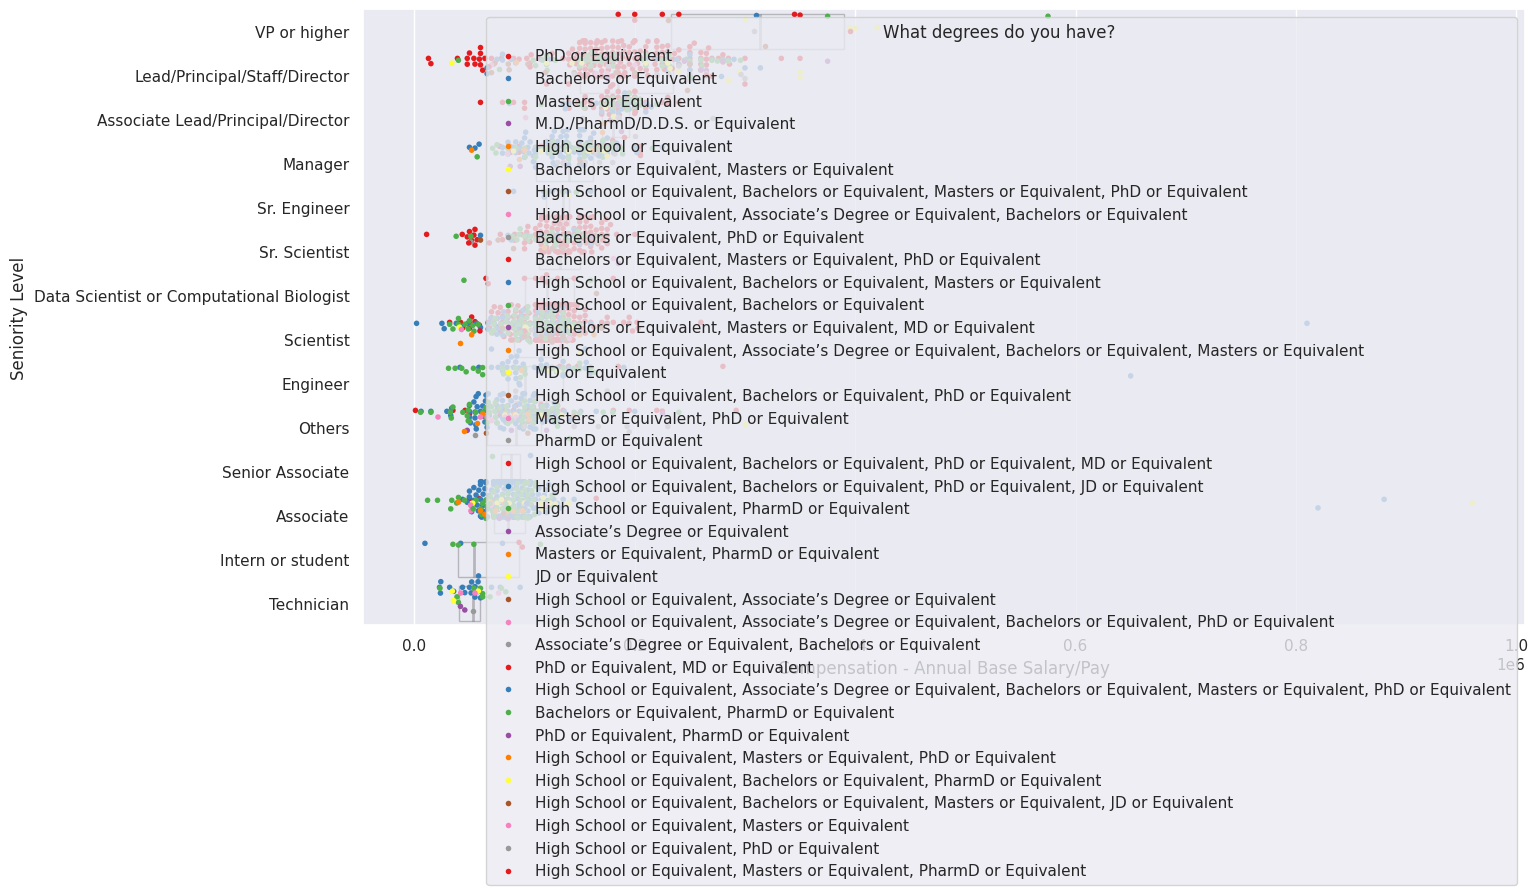

In [246]:
y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
# x_column = 'Total Annual Compensation'
median_values = df.groupby(y_column)[x_column].median().reset_index()
median_values = median_values.sort_values(by=x_column, ascending=False)

hue_list = list(economic_region_mapping.keys())
hue_list.append('')

plt.figure(figsize=(15,8))
ax = sns.swarmplot(
    data=df, 
    x=x_column,
    y=y_column,
    # hue='Economic Region', #Biotech sub industry?
    hue='What degrees do you have? ',
    # hue_order=hue_list,
    size=4,
    dodge=True,
    palette='Set1',
    order=median_values[y_column],
    )

# overlay boxplot
sns.boxplot(
    data=df, 
    x=x_column,
    y=y_column,
    palette='viridis',
    order=median_values[y_column],
    showcaps=False,
    boxprops={'facecolor':'None', 'edgecolor': 'k', 'alpha': 0.25},
    medianprops={'color':'k','alpha': 0.25, 'linewidth':2},
    showfliers=False,
    whiskerprops={'linewidth':0}, 
    ax=ax,
    capprops={'alpha':0.5}
)

plt.show()

In [247]:
import plotly.graph_objects as go

levels = median_values[y_column]

fig = go.Figure()
for idx, level in enumerate(levels):
    sub_df = df[df[y_column]==level][[x_column,y_column,'Role / Title of current position']]
    x_vals = sub_df[x_column]
    fig.add_scatter(
        x=x_vals,
        y=[idx]*len(x_vals),
        mode='markers',
        name=level,
        text=sub_df,
        hovertemplate = """
Role Title: %{text[2]}<br>
Seniority: %{text[1]}
        """
    )

fig.update_layout(
    height=800
)
fig.show()

In [248]:
# Mapping from size to marker_size
company_size_to_marker_size = {
    '1-50': 3,
    '50-200': 4,
    '200-1000': 5,
    '1000-5000': 6,
    '5000+': 7
}

df['marker_size'] = df['Company Detail - Approximate Company Size'].map(company_size_to_marker_size)

# US, Base Comp vs Education

In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
df['Where are you located?'].unique()

array([nan, 'Canada', 'West Coast (California & Pacific Northwest)',
       'France', 'Pharma Central (NY, NJ, PA)',
       'United Kingdom and Ireland', 'denmark', 'Germany',
       'Carolinas & Southeast (From NC to AR, South FL and LA)',
       'New England (MA, CT, RI, NH, VT, ME)',
       'DC Metro Area (DC, VA, MD, DE)', 'Spain',
       'Midwest (From OH to KS, North to ND)', 'Belgium', 'EU',
       'South & Mountain West (TX to AZ, North to MT)', 'india',
       'Other US Location (HI, AK, PR, etc.)', 'CO', 'Sweden',
       'Singapore', 'San Diego, CA', 'Australia', 'Switzerland',
       'Benelux', 'Denmark', 'Netherlands', 'Switzerland ', 'Remote - US',
       'Research Triangle Park, NC', 'spain', 'Poland', 'Argentine',
       'Australia ', 'Austria', 'australia', 'Boston', 'Kenya',
       'Tennessee ', 'NL', 'India', 'FRANCE', 'France ', 'Chile ',
       'russia', 'Central VA', 'San Diego', 'Netherlands ', 'Belgium ',
       'Spain (Barcelona)', 'Finland', 'Elkton, Virginia',

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

10.0% of the

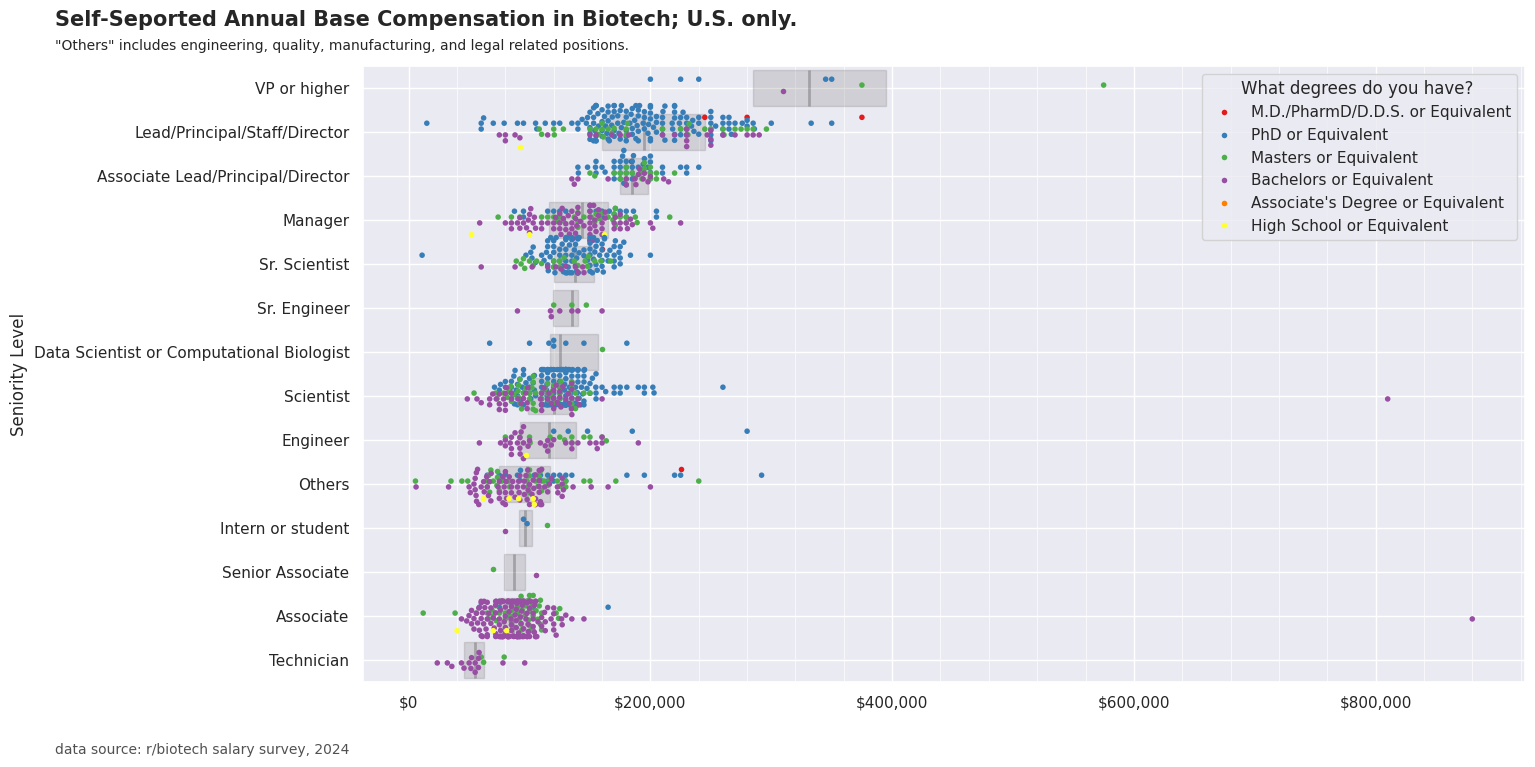

In [251]:


# include U.S. responses only
us_keywords = ['U.S.','Great Lakes','West Coast', 'Pharma Central','Carolinas & Southeast','New England', 'DC Metro Area','Midwest','South & Mountain West','Other US']

df_us = df[df['Economic Region'].str.contains('|'.join(us_keywords), case=False, na=False)]

y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
# hue_column = 'Biotech sub industry?'
# hue_order = None
hue_column = 'What degrees do you have? '
hue_order = [
        'M.D./PharmD/D.D.S. or Equivalent',
        'PhD or Equivalent',
        'Masters or Equivalent', 
        'Bachelors or Equivalent',
        "Associate's Degree or Equivalent",
        'High School or Equivalent',
        ]
# x_column = 'Total Annual Compensation'

median_values = df_us.groupby(y_column)[x_column].median().reset_index()
median_values = median_values.sort_values(by=x_column, ascending=False)

hue_list = list(economic_region_mapping.keys())
hue_list.append('')

plt.figure(figsize=(15,8))
# plt.figure(figsize=(8,5))

ax = sns.swarmplot(
    data=df_us, 
    x=x_column,
    y=y_column,
    # hue='Economic Region', #Biotech sub industry?
    hue=hue_column,
    hue_order=hue_order,
    # hue_order=hue_list,
    size=4,
    dodge=True,
    palette='Set1',
    order=median_values[y_column],
    )

# overlay boxplot
sns.boxplot(
    data=df_us, 
    x=x_column,
    y=y_column,
    palette='viridis',
    order=median_values[y_column],
    showcaps=False,
    boxprops={'facecolor':'grey', 'edgecolor': 'grey', 'alpha': 0.25},
    medianprops={'color':'k','alpha': 0.25, 'linewidth':2},
    showfliers=False,
    whiskerprops={'linewidth':0}, 
    ax=ax,
    capprops={'alpha':0.5}
)

ax.grid(which = "major", axis="y")
ax.grid(which = "minor", axis="x", linewidth = 0.5)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

ax.get_xaxis().set_major_formatter('${x:,.0f}')
ax.set_xlabel(None)

subtitle = '"Others" includes engineering, quality, manufacturing, and legal related positions.'
title = 'Self-Seported Annual Base Compensation in Biotech; U.S. only.'
sm.add_titles(
    title_label=title,
    subtitle_label=subtitle,
    base_xpos = -0.08,
    base_ypos = 0.9,
    datasource_label=f'data source: {datasource_label}',
    datasource_ypos=0.02,
    fig=plt.gcf()    
)
# sm.datasource(
#     label='data source: r/biotech salary survey, 2022.',
#     xpos=0.125,
#     ypos=0.02,
#     fig=plt.gcf()
# )
plt.show()

In [252]:
df['Economic Region'].unique()

array(['U.S. West Coast', 'U.S. Southeast', 'New England', 'U.S. Mideast',
       nan, 'EU', 'Great Lakes', 'United Kingdom', 'U.S. Plains',
       'U.S. Rocky Mountains', 'Canada',
       'West Coast (California & Pacific Northwest)', 'France',
       'Pharma Central (NY, NJ, PA)', 'United Kingdom and Ireland',
       'denmark', 'Germany',
       'Carolinas & Southeast (From NC to AR, South FL and LA)',
       'New England (MA, CT, RI, NH, VT, ME)',
       'DC Metro Area (DC, VA, MD, DE)', 'Spain',
       'Midwest (From OH to KS, North to ND)', 'Belgium',
       'South & Mountain West (TX to AZ, North to MT)', 'india',
       'Other US Location (HI, AK, PR, etc.)', 'CO', 'Sweden',
       'Singapore', 'San Diego, CA', 'Australia', 'Switzerland',
       'Benelux', 'Denmark', 'Netherlands', 'Switzerland ', 'Remote - US',
       'Research Triangle Park, NC', 'spain', 'Poland', 'Argentine',
       'Australia ', 'Austria', 'australia', 'Boston', 'Kenya',
       'Tennessee ', 'NL', 'India', 

In [253]:
df['Economic Region'].str.contains('|'.join(us_keywords), case=False, na=False).sum()

np.int64(1519)

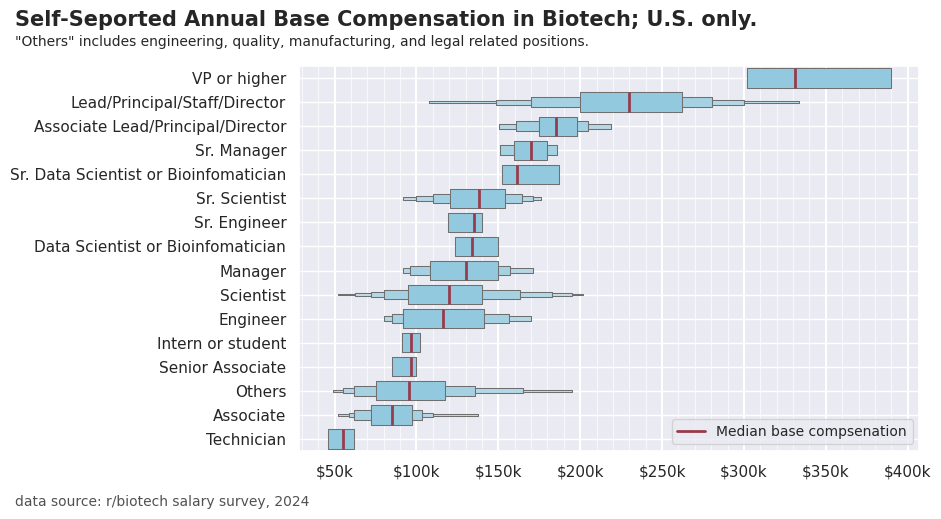

In [353]:
# include U.S. responses only
from mappings import map_seniority_levels
df = map_seniority_levels(df)

us_keywords = ['U.S.','Great Lakes','West Coast', 'Pharma Central','Carolinas & Southeast','New England', 'DC Metro Area','Midwest','South & Mountain West','Other US']

df_us = df[df['Economic Region'].str.contains('|'.join(us_keywords), case=False, na=False)]


y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
# hue_column = 'Highest achieved Formal Education'
# hue_order = [
#         'M.D./PharmD/D.D.S. or Equivalent',
#         'PhD or Equivalent',
#         'Masters or Equivalent', 
#         'Bachelors or Equivalent',
#         "Associate's Degree or Equivalent",
#         'High School or Equivalent',
#         ]
# x_column = 'Total Annual Compensation'

median_values = df_us.groupby(y_column)[x_column].median().reset_index()
median_values = median_values.sort_values(by=x_column, ascending=False)

# hue_list = list(economic_region_mapping.keys())
# hue_list.append('')

plt.figure(figsize=(8,5))

ax = sns.boxenplot(
    data=df_us, 
    x=x_column,
    y=y_column,
    color="skyblue",
    order=median_values[y_column],
    showfliers=False,
    line_kws={'color':'#963c4c','alpha': 1, 'linewidth':2},

)

ax.grid(which = "major", axis="y", linewidth = 1)
ax.grid(which = "major", axis="x", linewidth = 1.5)
ax.grid(which = "minor", axis="x", linewidth = 0.5)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))

def format_ticks(x, pos):
    return '${:,.0f}k'.format(x / 1000)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
ax.set_xlabel(None)
ax.set_ylabel(None)

subtitle = '"Others" includes engineering, quality, manufacturing, and legal related positions.'
title = 'Self-Seported Annual Base Compensation in Biotech; U.S. only.'
sm.add_titles(
    title_label=title,
    subtitle_label=subtitle,
    base_xpos = -0.23,
    base_ypos = 0.92,
    datasource_label=f'data source: {datasource_label}',
    datasource_ypos=0,
    fig=plt.gcf()    
)
# sm.datasource(
#     label=f'Data: {datasource_label}',
#     xpos=-0.23,
#     ypos=0,
#     fig=plt.gcf()
# )

legend_elements = [
    Line2D([0], [0], color='#963c4c', lw=2, label='Median base compsenation'),
    ]
plt.legend(handles=legend_elements, loc='lower right', fontsize='small')

plt.savefig('../../assets/2025-06-biotech/salary-vs-level-2024.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# debugging seniority level mapping
df_us[df_us['Seniority Level']== 'Manager'][[y_column,x_column,'Role / Title of current position']].sort_values(by=x_column, ascending=False).head(50)

,Seniority Level,Compensation - Annual Base Salary/Pay,Role / Title of current position
1328,Manager,257000.0,District Sales Manager
755,Manager,205000.0,Manager Computational Biology
442,Manager,202000.0,Life Science Estimating Manager
616,Manager,200000.0,Territory Manager
219,Manager,175000.0,Product Manager
1054,Manager,171000.0,Manager
1657,Manager,171000.0,Sr mgr qc
116,Manager,166000.0,Medical Writing Manager
889,Manager,165000.0,Account Manager
850,Manager,162000.0,Manager


In [300]:
print(f'In total, there are {df.shape[0]} responses;')
print(f'of which {df_us.shape[0]} respondents are from the U.S.')

In total, there are 1750 responses;
of which 1519 respondents are from the U.S.


In [301]:
y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
df[(df[y_column]=="Sr Scientist") & (df[x_column]>1e6)][x_column]

Series([], Name: Compensation - Annual Base Salary/Pay, dtype: float64)

In [302]:
df.iloc[498]

Timestamp                                                                                                        2/24/2024 22:43:26
What country do you work in?                                                                                                    NaN
Where is the closest major city or hub?                                                                                         NaN
Where are you located?                                                                South & Mountain West (TX to AZ, North to MT)
Biotech sub industry?                                                                                            Industrial Biotech
Company or Institution Name                                                                                       Prefer not to say
Company Details - public/private/start-up/ subsidiary of                                                                     Public
Company Detail - Approximate Company Size                                   

In [303]:
df[df['Seniority Level']=='Other']['Role / Title of current position']

Series([], Name: Role / Title of current position, dtype: object)

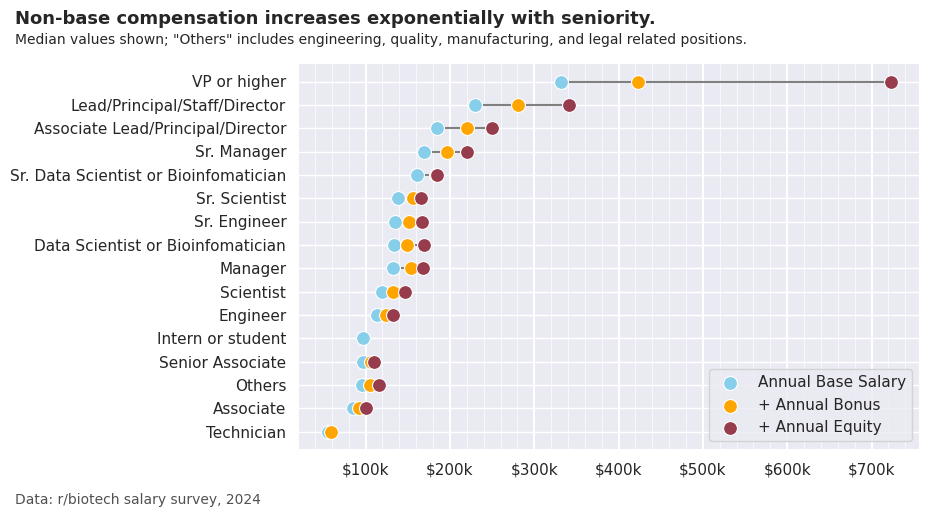

In [304]:
from helper import make_dumbbell

y_column = 'Seniority Level'
x_column1 = 'Compensation - Annual Base Salary/Pay'
x_column2 = 'Annual Target Bonus'
x_column3 = 'Annual Equity'
x_column_total = 'Total Annual Compensation'

median_values_df = df_us.replace(0, np.nan).groupby(y_column)[[x_column1, x_column2, x_column3]].median().reset_index()
median_values_df = median_values_df.sort_values(by=x_column1, ascending=False).reset_index(drop=True)
median_values_df['x1'] = median_values_df[x_column1]
median_values_df['x2'] = median_values_df[x_column1]+median_values_df[x_column2]
median_values_df['x3'] = median_values_df[x_column1]+median_values_df[x_column2]+median_values_df[x_column3]

labels = ["Annual Base Salary","+ Annual Bonus", "+ Annual Equity"]
colors = ['skyblue','orange','#963c4c']
        
f, ax = make_dumbbell(
    df=median_values_df, 
    y_column=y_column,
    x_cols=['x1','x2','x3'],
    colors=colors,
    labels=labels
    )
# Customize the axes and legend
def format_ticks(x, pos):
    return '${:,.0f}k'.format(x / 1000)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
ax.set(xlabel='Median Annual Compensation', ylabel=y_column)
ax.xaxis.labelpad = 10
ax.grid(which = "major", axis="y", linewidth = 1)
ax.grid(which = "major", axis="x", linewidth = 1.5)
ax.grid(which = "minor", axis="x", linewidth = 0.5)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
sns.despine(left=True, bottom=True)
ax.set_xlabel(None)
ax.set_ylabel(None)

plt.legend()

title="Non-base compensation increases exponentially with seniority."
subtitle='Median values shown; "Others" includes engineering, quality, manufacturing, and legal related positions.'

sm.add_titles(
    title_label=title,
    subtitle_label=subtitle,
    title_size=13,
    base_xpos = -0.23,
    base_ypos = 0.92,
    fig=plt.gcf()
    
)
sm.datasource(
    label=f'Data: {datasource_label}',
#     xpos=0.125,
    xpos=-0.23,
    ypos=0,
    fig=plt.gcf()
)
plt.show()

In [305]:
print("Percentage of responses that does not have any annual bonus or equity:")
(df_us[['Annual Equity','Annual Target Bonus']] == 0).sum()/df_us.shape[0] * 100


Percentage of responses that does not have any annual bonus or equity:


Annual Equity          64.976959
Annual Target Bonus    26.333114
dtype: float64

<Axes: ylabel='Seniority Level'>

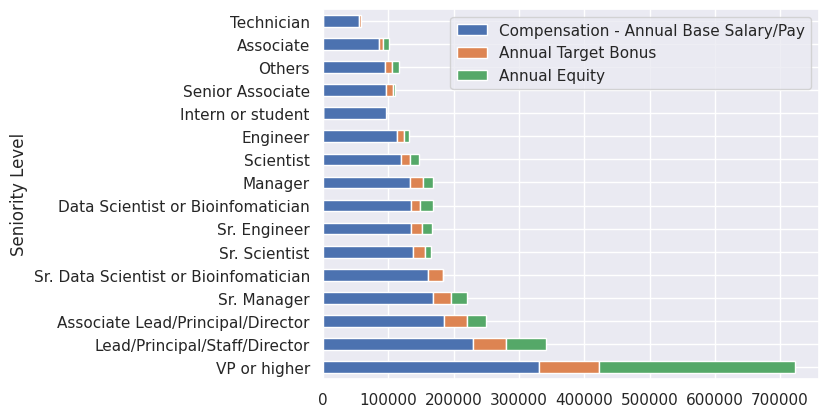

In [306]:
# Is this info better presented as a stacked bar?
y_column = 'Seniority Level'
x_column1 = 'Compensation - Annual Base Salary/Pay'
x_column2 = 'Annual Target Bonus'
x_column3 = 'Annual Equity'
x_column_total = 'Total Annual Compensation'

median_values_df = df_us.replace(0, np.nan).groupby(y_column)[[x_column1, x_column2,x_column3]].median().reset_index()
median_values_df = median_values_df.sort_values(by=x_column1, ascending=False)
median_values_df = median_values_df.set_index('Seniority Level')
median_values_df.plot(
    kind='barh',
    stacked=True,
)
# # Customize the axes and legend
# def format_ticks(x, pos):
#     return '${:,.0f}k'.format(x / 1000)

# ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
# ax.set(xlabel='Median Annual Compensation', ylabel=y_column)
# ax.xaxis.labelpad = 10
# ax.grid(which = "major", axis="y", linewidth = 1)
# ax.grid(which = "major", axis="x", linewidth = 1.5)
# ax.grid(which = "minor", axis="x", linewidth = 0.5)
# ax.minorticks_on()
# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# sns.despine(left=True, bottom=True)
# ax.set_xlabel(None)
# ax.set_ylabel(None)

# plt.legend()

# title="Non-base compensation can make up a large proportion of total compensation"
# subtitle='Total = base + equity + target annual bonus; "Others" includes quality-, manufacturing-, or production-related positions.'
# sm.add_titles(
#     title_label=title,
#     subtitle_label=subtitle,
#     title_size=13,
#     base_xpos = -0.23,
#     base_ypos = 0.92,
#     fig=plt.gcf()
    
# )
# sm.datasource(
#     label=f'data source: {datasource_label}.',
# #     xpos=0.125,
#     xpos=-0.23,
#     ypos=0,
#     fig=plt.gcf()
# )
# plt.show()

# Compensation vs company size

In [307]:
from helper import make_multi_dumbbell

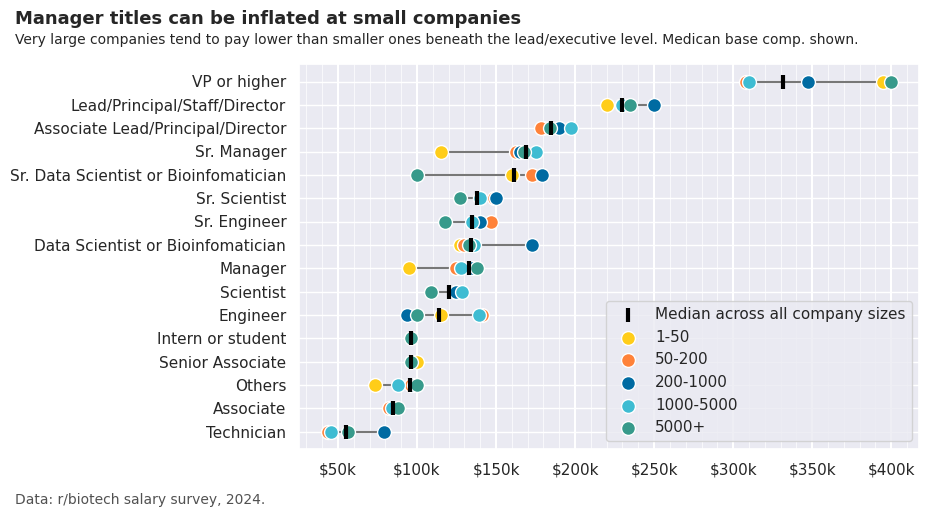

In [324]:

y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
group_column = 'Company Detail - Approximate Company Size'

median_values_df = df_us.groupby(y_column)[[x_column]].median().reset_index()
median_values_df['Company Detail - Approximate Company Size'] = 'Median across all company sizes'

grouped_df = df_us.groupby([y_column,group_column])[[x_column]].median().reset_index()
grouped_with_median_df = pd.concat([grouped_df, median_values_df])

grouped_with_median_df['priority'] = grouped_with_median_df[group_column] == 'Median across all company sizes'
grouped_with_median_df = grouped_with_median_df.sort_values(by=['priority',x_column], ascending=False)

y_order = grouped_with_median_df[grouped_with_median_df['priority']][y_column]

colors = [
"#000000",
"#ffcd19",
"#ff8239",
"#006BA2",
"#3EBCD2",
"#379A8B",
"#ff3943",
"#9A607F",
"#963c4c",
"#D1B07C",
]


groups = ['Median across all company sizes','1-50', '50-200', '200-1000','1000-5000','5000+']
f, ax = make_multi_dumbbell(
    df=grouped_with_median_df, 
    x_column=x_column, 
    group_column=group_column, 
    groups=groups, 
    y_column=y_column,
    colors=colors,
    y_order = y_order,
    marker = ['|','o','o','o','o','o','o']
    )

# Customize the axes and legend
def format_ticks(x, pos):
    return '${:,.0f}k'.format(x / 1000)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))
ax.set(xlabel='Median Annual Compensation', ylabel=y_column)
ax.xaxis.labelpad = 10

ax.grid(which = "major", axis="y", linewidth = 1)
ax.grid(which = "major", axis="x", linewidth = 1.5)
ax.grid(which = "minor", axis="x", linewidth = 0.5)
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# sns.despine(left=True, bottom=True)
ax.set_xlabel(None)
ax.set_ylabel(None)

# plt.legend()

title="Manager titles can be inflated at small companies"
subtitle='Very large companies tend to pay lower than smaller ones beneath the lead/executive level. Medican base comp. shown.'
# subsubtitle='their compensation and responsibilities don\'t necessarily align with the rest of the industry.'
sm.add_titles(
    title_label=title,
    subtitle_label=subtitle,
    # subsubtitle_label=subsubtitle,
    title_size=13,
    base_xpos = -0.23,
    base_ypos = 0.92,
    fig=plt.gcf()
    
)
sm.datasource(
    label=f'Data: {datasource_label}.',
#     xpos=0.125,
    xpos=-0.23,
    ypos=0,
    fig=plt.gcf()
)
plt.show()

In [315]:
df.columns.unique()

Index(['Timestamp', 'What country do you work in?',
       'Where is the closest major city or hub?', 'Where are you located?',
       'Biotech sub industry?', 'Company or Institution Name',
       'Company Details - public/private/start-up/ subsidiary of ',
       'Company Detail - Approximate Company Size',
       'Role / Title of current position', 'What degrees do you have? ',
       'List other relevant and recognized certifications',
       '[Optional] Briefly describe your position', 'Years of Experience',
       'Compensation - Annual Base Salary/Pay', 'Compensation - Overtime Pay',
       'Compensation - Annual Target Bonus ($)',
       'Compensation - Annual Equity/Stock Option',
       'Compensation - Most recent annual yearly raise (%)',
       'Compensation - Sign on Bonus Value',
       'Compensation - Sign on Stock/Equity Options',
       'Compensation - Retirement Benefits (free text)',
       'Compensation - Retirement Percent Match (free text)',
       'Compensation -

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/kchou/repos/kfchou.github.io/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning:

18.9% of the 

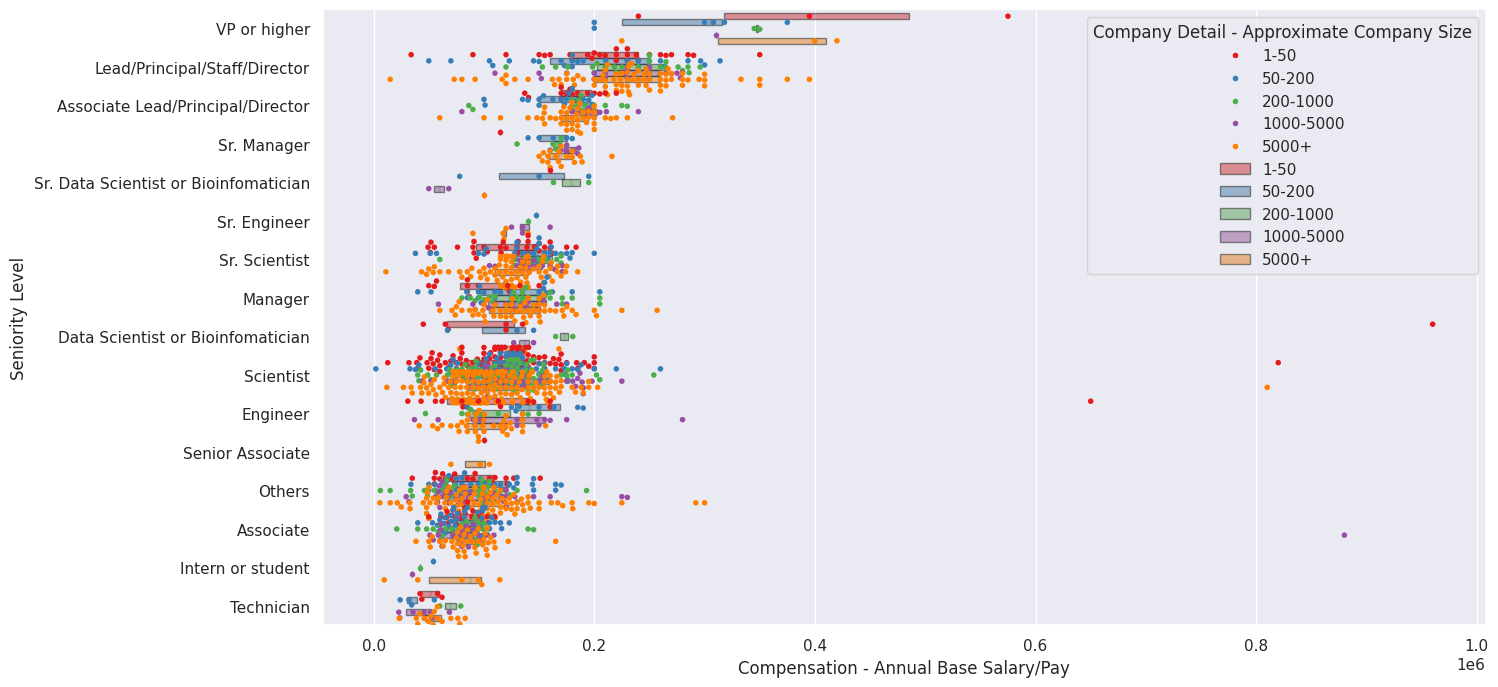

In [309]:
y_column = 'Seniority Level'
x_column = 'Compensation - Annual Base Salary/Pay'
# x_column = 'Total Annual Compensation'
median_values = df.groupby(y_column)[x_column].median().reset_index()
median_values = median_values.sort_values(by=x_column, ascending=False)

hue_list = list(economic_region_mapping.keys())
hue_list.append('')

plt.figure(figsize=(15,8))
ax = sns.swarmplot(
    data=df, 
    x=x_column,
    y=y_column,
    # hue='Economic Region', #Biotech sub industry?
    hue='Company Detail - Approximate Company Size',
    # hue_order=hue_list,
    size=4,
    dodge=1,
    palette='Set1',
    order=median_values[y_column],
    hue_order=['1-50', '50-200', '200-1000','1000-5000','5000+',],
    )

# overlay boxplot
sns.boxplot(
    data=df, 
    x=x_column,
    y=y_column,
    hue='Company Detail - Approximate Company Size',
    hue_order=['1-50', '50-200', '200-1000','1000-5000','5000+',],
    palette='Set1',
    order=median_values[y_column],
    showcaps=False,
    boxprops={'edgecolor': 'k', 'alpha': 0.5},
    medianprops={'color':'k','alpha': 0.1, 'linewidth':2},
    showfliers=False,
    whiskerprops={'linewidth':0}, 
    ax=ax,
    capprops={'alpha':0.5}
)

plt.show()

* Generally, small companies have lower compensation compared to larger companies.
* "Managers" at small companies, presumably startups, have really low relative compensation. These positions typically require less years of experience.

# Compensation by Education

<Axes: xlabel='Compensation - Annual Base Salary/Pay, 000', ylabel='What degrees do you have? '>

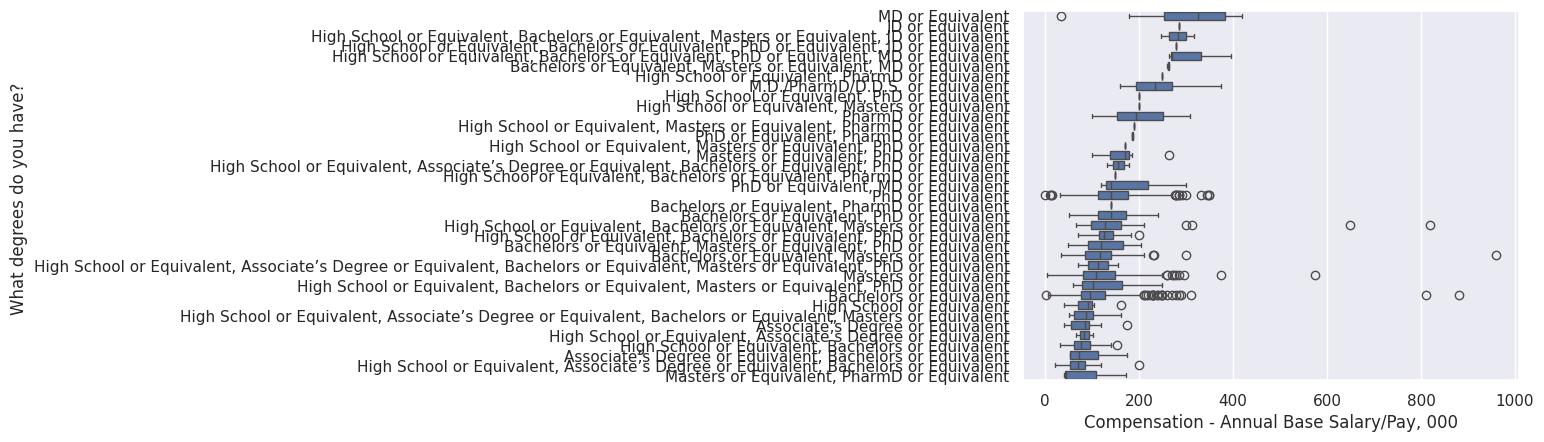

In [310]:
df['Compensation - Annual Base Salary/Pay, 000'] = df['Compensation - Annual Base Salary/Pay']/1000
# y_column = 'Highest achieved Formal Education'
y_column = 'What degrees do you have? '
x_column = 'Compensation - Annual Base Salary/Pay, 000'

median_values = df.groupby(y_column)[x_column].median().reset_index()
median_values = median_values.sort_values(by=x_column, ascending=False)

# overlay boxplot
sns.boxplot(
    data=df, 
    x=x_column,
    y=y_column,
    order=median_values[y_column],
)

In [311]:
df[ 'Compensation - Annual Target Bonus ($)'].unique()

array(['10-12%', '5%', '34000', '12000', '9800', '7600', '20%', '48000',
       '15%', '$5,000', 'Not Applicable/None', '18000', '21000', '40000',
       '13000', '8%', '10000', '7120', '10%', '58000', '22000', '$10,000',
       '24000', '25%', '14000', '11000', '29000', '20250', '16680',
       '49000', '33000', '36000', '8761.95', '72800', '11500', '5750',
       '13500', '30000', '42000', '18,000', '3750', '12480', '15000',
       '26960', '17550', '23000', '7%', '20000', '23700', '2500', '12500',
       '15,500', '60000', '36800', '6,225', '9400', '9000', '26250',
       '6500', '12%', '38800', '50000', '18500', '28000', '18%', '93750',
       '18% of base salary, but a multiplier is applied based on review, up to 33%',
       '55000', '49800', '65000', '15300', '7200', '70,000', '8000',
       '17250', '6%', '100000', '17000', '37000', '17500', '12.50%',
       '$15,000', '15600', '25500', '7500', '6000', '10,500', '6700',
       '20,700', '13%', '19800', '27000', '8600', '8', '19

In [312]:
df['Compensation - Annual Equity/Stock Option'].unique()

array(['Not Applicable/None', '70000', '5000',
       'Stock options awarded every year.', '~2500 in options', '$2,500',
       '20000', 'Depends on market value (stock options)',
       'IDK … 10s of thousands', '$20,000', '85000', '13000', '40000',
       '0', '12000', '15000', '15k', '29000', '22000', '65000', '55000',
       '30000', '410000', '5 years', '82000', '10000', '10%', '2000',
       '53000', '8000', '45000', '$35k ', '112500', '$85k in RSUs',
       'ISO for meeting goals', '2000 RSUs', '75000', '130000', '4500',
       '125000', '1000', '10,000', '8500', '100000',
       'Private Stock Options', 'Depends on year', '25500', 'RSUs',
       '$25,000', 'Tbd', '25000', 'Stock options, non IPO', '750', '25%',
       '46420', '7.5% base salary RSUs vest every 3 yrs', '60000', '3600',
       '1200 ISO/year  600 RSU/year', '9000', '167000', 'Options/RSUs',
       '150000', 'Options are all underwater $0', '30,000', '7000',
       '$80,000', '9500', '$12000 worth of stock every y

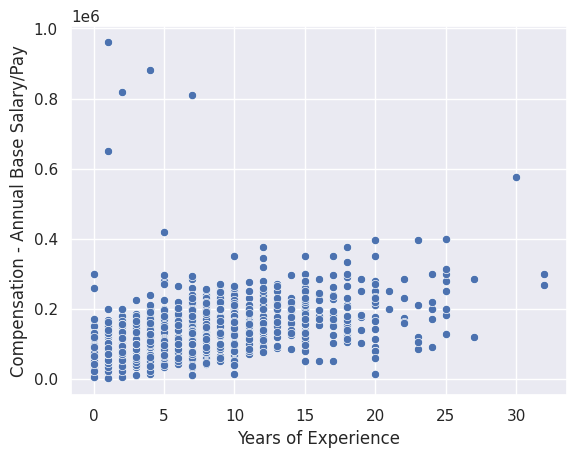

In [313]:
sns.scatterplot(df, x='Years of Experience', y='Compensation - Annual Base Salary/Pay')
plt.show()

In [314]:
df['Compensation - Annual Base Salary/Pay']

0       155000.0
1        51500.0
2       170000.0
3       120000.0
4        98000.0
          ...   
1745    276000.0
1746    180000.0
1747    148800.0
1748     99940.0
1749    116500.0
Name: Compensation - Annual Base Salary/Pay, Length: 1750, dtype: float64